<a href="https://colab.research.google.com/github/ReynardGhazyTsaqif/KumpulanDataset/blob/main/Tugas%20Pert%207%20JST/Reynard_Ghazy_Tsaqif_2311532014_Tugas_Pert_7_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [42]:
url = "https://raw.githubusercontent.com/ReynardGhazyTsaqif/KumpulanDataset/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(url)

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
df.info()

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [44]:
X = df.drop('NObeyesdad', axis=1)  # fitur
y = df['NObeyesdad']              # label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # hidden layer 1
    Dense(32, activation='relu'),                                   # hidden layer 2
    Dense(len(np.unique(y)), activation='softmax')                  # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2067 - loss: 1.8608 - val_accuracy: 0.5089 - val_loss: 1.5870
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5606 - loss: 1.4922 - val_accuracy: 0.6302 - val_loss: 1.2315
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6470 - loss: 1.1732 - val_accuracy: 0.6864 - val_loss: 0.9696
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6915 - loss: 0.9411 - val_accuracy: 0.7456 - val_loss: 0.8198
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7525 - loss: 0.7911 - val_accuracy: 0.7663 - val_loss: 0.7114
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7789 - loss: 0.6772 - val_accuracy: 0.7899 - val_loss: 0.6327
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8173 - loss: 0.6241 - val_accuracy: 0.8195 - val_loss: 0.5740
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.5650 - val_accuracy: 0.8373 - val_loss:

In [48]:
y_pred = np.argmax(model.predict(X_test), axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Akurasi:", acc)
print("F1-score:", f1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Akurasi: 0.9432624113475178
F1-score: 0.9430212047012686


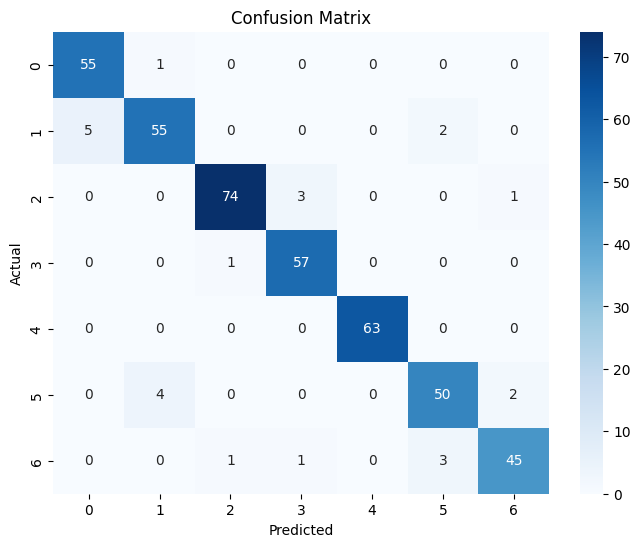

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [50]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.92      0.89      0.90        62
           2       0.97      0.95      0.96        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.91      0.89      0.90        56
           6       0.94      0.90      0.92        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

